In [1]:
# This line configures matplotlib to show figures embedded in the notebook, 
# instead of poping up a new window. More about that later. 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline

In [3]:
from pylab import *
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
from scipy.interpolate import interp1d
import numpy as np

In [5]:
df = pd.read_csv('./result.csv')
df = df.set_index('nodes')

In [6]:
df.head()

,mems
nodes,
10,97.666016
20,332.064453
30,527.396484
40,722.728516
50,937.593750


In [7]:
df.index

Int64Index([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], dtype='int64', name='nodes')

Text(0, 0.5, 'Memory (MB)')

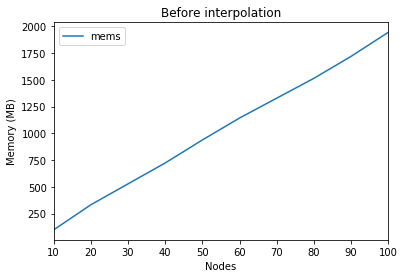

In [8]:
ax = df.plot.line()
ax.set_title('Before interpolation')
ax.set_xlabel("Nodes")
ax.set_ylabel("Memory (MB)")

In [10]:
f = interp1d(df.index, df['mems'], kind='cubic')

In [13]:
df_int = pd.DataFrame()
new_index = np.arange(10, 110, 10)
df_int['mems'] = f(new_index)
df_int.index = new_index

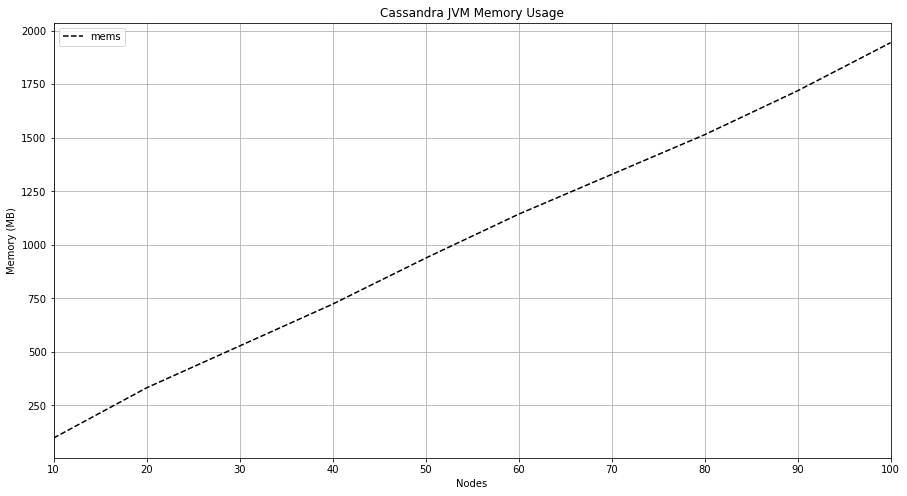

In [14]:
ax2 = df_int.plot.line(figsize=(15,8), style='k--', grid=True)
ax2.set_title('Cassandra JVM Memory Usage')
ax2.set_xlabel("Nodes")
ax2.set_ylabel("Memory (MB)")
plt.savefig('plot.png')

df_after = pd.read_csv('./data2_after_heap.csv')
df_after = df_after.set_index('nodes')

df_after.head()

df_after.index

ax3 = df_after.plot.line()
ax3.set_title('Before interpolation')
ax3.set_xlabel("Nodes")
ax3.set_ylabel("Memory (MB)")

f = interp1d(df_after.index, df_after['memory'], kind='cubic')

df_int_after = pd.DataFrame()
new_index = np.arange(5, 100, 5)
# print(new_index)
df_int_after['memory'] = f(new_index)
df_int_after.index = new_index

ax4 = df_int_after.plot.line(figsize=(15,8), style='k--', grid=True)
ax4.set_title('Cassandra JVM Memory Usage')
ax4.set_xlabel("Nodes")
ax4.set_ylabel("Memory (MB)")
plt.savefig('plot2.png')